# Telco dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### Import dataset e preparazione dati

In [2]:
dataset = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.train.csv")
dataset

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
1,No,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
2,Yes,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
3,Yes,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
4,No,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Yes,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95
5630,No,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3
5631,No,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5632,Yes,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


In [3]:
#mapping Churn in 1 e 0
dataset.Churn = dataset.Churn.map({"Yes": 1, "No":0})

dataset.SeniorCitizen = dataset.SeniorCitizen.map({1:"Yes",0:"No"})

#colonne con "no internet service" da rimpiazzare
columns_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                      'StreamingTV', 'StreamingMovies']
for i in columns_to_replace : 
    dataset[i]  = dataset[i].replace({'No internet service' : 'No'})

#Rimuovo i dati senza Total Charge
dataset['TotalCharges'] = dataset["TotalCharges"].replace(" ",np.nan)
dataset = dataset[dataset["TotalCharges"].notnull()]
dataset = dataset.reset_index()[dataset.columns]
dataset["TotalCharges"] = dataset["TotalCharges"].astype(float)


dataset

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80
1,0,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
2,1,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
3,1,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
4,0,4291-SHSBH,Male,0,No,No,7,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,1,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5620,0,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30
5621,0,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,21.15,306.05
5622,1,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


Min & Max of tenure: 1 72
Min & Max of monthly charges: 18.25 118.6
Min & Max of total charges: 18.8 8684.8


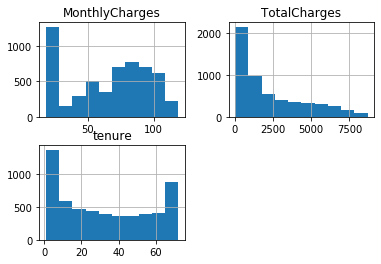

In [4]:
print("Min & Max of tenure:",dataset.tenure.min(),dataset.tenure.max())
print("Min & Max of monthly charges:",dataset.MonthlyCharges.min(),dataset.MonthlyCharges.max())
print("Min & Max of total charges:",dataset.TotalCharges.min(),dataset.TotalCharges.max())
hist = dataset.hist(["tenure","MonthlyCharges","TotalCharges"])

In [5]:
data = dataset.drop(["customerID"], axis=1)

labelEncoder = LabelEncoder()
cols = ["gender","SeniorCitizen","Partner","Dependents",
       "PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
        "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract",
        "PaperlessBilling","PaymentMethod"]
for c in cols :
    data[c] = LabelEncoder().fit_transform(data[c])
data

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,1,21,1,0,0,1,0,1,0,0,1,1,0,3,64.85,1336.80
1,0,0,0,0,0,54,1,2,1,0,1,0,0,1,1,2,1,0,97.20,5129.45
2,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,23.45
3,1,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,237.95
4,0,1,0,0,0,7,1,0,1,0,0,0,0,0,0,0,1,2,69.55,521.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,1,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,1,2,95.00,95.00
5620,0,0,0,1,1,23,1,2,0,1,1,1,1,1,1,2,1,1,91.10,2198.30
5621,0,1,0,1,1,12,1,0,2,0,0,0,0,0,0,0,1,2,21.15,306.05
5622,1,1,1,0,0,12,1,2,1,0,0,1,0,1,1,0,1,2,99.45,1200.15


### Split dataset

In [6]:
train, test = train_test_split(data, test_size=0.2)
y_train = train.Churn
y_test = test.Churn
x_train = train.loc[:, train.columns != "Churn"]
x_test = test.loc[:, train.columns != "Churn"]

print("train", train.shape)
print("test", test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)
print("x_train", x_train.shape)
print("x_test", x_test.shape)

train (4499, 20)
test (1125, 20)
y_train (4499,)
y_test (1125,)
x_train (4499, 19)
x_test (1125, 19)


### Loop per verificare l'accuracy al variare di alcuni parametri e di diversi modelli

#### LogisticRegression

In [7]:
from sklearn.linear_model import LogisticRegression

train_score=[]
test_score=[]
for c in [0.01,0.1,1,10,100]:
    logreg = LogisticRegression(C=c)
    logreg.fit(x_train, y_train)
    print("Parametro C:", c)
    print("Accuracy on training set: {:.8f}".format(logreg.score(x_train, y_train)))
    train_score.append(logreg.score(x_train, y_train))
    print("Accuracy on test set: {:.8f}".format(logreg.score(x_test, y_test)))
    test_score.append(logreg.score(x_test, y_test))

Parametro C: 0.01
Accuracy on training set: 0.79706601
Accuracy on test set: 0.81244444
Parametro C: 0.1
Accuracy on training set: 0.79662147
Accuracy on test set: 0.80888889


C:\Users\Marco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Marco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Parametro C: 1
Accuracy on training set: 0.79573238
Accuracy on test set: 0.80800000
Parametro C: 10
Accuracy on training set: 0.79573238
Accuracy on test set: 0.80800000
Parametro C: 100
Accuracy on training set: 0.79484330
Accuracy on test set: 0.80800000


C:\Users\Marco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### KNeighborsClassifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

train_score=[]
test_score=[]
for n in range(1,10):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train, y_train)
    print("Neighbors:", i)
    print("Accuracy on training set: {:.8f}".format(clf.score(x_train, y_train)))
    train_score.append(clf.score(x_train, y_train))
    print("Accuracy on test set: {:.8f}".format(clf.score(x_test, y_test)))
    test_score.append(clf.score(x_test, y_test))

Neighbors: StreamingMovies
Accuracy on training set: 0.99844410
Accuracy on test set: 0.70755556
Neighbors: StreamingMovies
Accuracy on training set: 0.85485663
Accuracy on test set: 0.76533333
Neighbors: StreamingMovies
Accuracy on training set: 0.85774617
Accuracy on test set: 0.74844444
Neighbors: StreamingMovies
Accuracy on training set: 0.82996221
Accuracy on test set: 0.77066667
Neighbors: StreamingMovies
Accuracy on training set: 0.83085130
Accuracy on test set: 0.75200000
Neighbors: StreamingMovies
Accuracy on training set: 0.81462547
Accuracy on test set: 0.78666667
Neighbors: StreamingMovies
Accuracy on training set: 0.81662592
Accuracy on test set: 0.76711111
Neighbors: StreamingMovies
Accuracy on training set: 0.81262503
Accuracy on test set: 0.78311111
Neighbors: StreamingMovies
Accuracy on training set: 0.81240276
Accuracy on test set: 0.76977778


#### DecisionTreeClassifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

train_score=[]
test_score=[]
for i in range(1,10):
    tree = DecisionTreeClassifier(max_depth=i,random_state=0)
    tree.fit(x_train, y_train)
    print("Max_depth:", i)
    print("Accuracy on training set: {:.8f}".format(tree.score(x_train, y_train)))
    train_score.append(tree.score(x_train, y_train))
    print("Accuracy on test set: {:.8f}".format(tree.score(x_test, y_test)))
    test_score.append(tree.score(x_test, y_test))

Max_depth: 1
Accuracy on training set: 0.73038453
Accuracy on test set: 0.74844444
Max_depth: 2
Accuracy on training set: 0.74838853
Accuracy on test set: 0.74133333
Max_depth: 3
Accuracy on training set: 0.78195154
Accuracy on test set: 0.78577778
Max_depth: 4
Accuracy on training set: 0.79084241
Accuracy on test set: 0.77955556
Max_depth: 5
Accuracy on training set: 0.79284285
Accuracy on test set: 0.78311111
Max_depth: 6
Accuracy on training set: 0.80306735
Accuracy on test set: 0.77066667
Max_depth: 7
Accuracy on training set: 0.81818182
Accuracy on test set: 0.77244444
Max_depth: 8
Accuracy on training set: 0.83196266
Accuracy on test set: 0.75822222
Max_depth: 9
Accuracy on training set: 0.84685486
Accuracy on test set: 0.76355556


### Modello della soluzione

In [10]:
from sklearn.linear_model import LogisticRegression

train_score=[]
test_score=[]
logreg = LogisticRegression(C=0.01)
logreg.fit(x_train, y_train)
print("Accuracy on training set: {:.8f}".format(logreg.score(x_train, y_train)))
print("Accuracy on test set: {:.8f}".format(logreg.score(x_test, y_test)))

Accuracy on training set: 0.79706601
Accuracy on test set: 0.81244444


C:\Users\Marco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
